In [ ]:
# initialization for my classroom
import os
from datetime import datetime as dt

def logfile(user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    prefix='/srv'
    if os.path.isdir(prefix) and os.access(prefix, os.W_OK):
        prefix+=('/'+user)
        if not os.path.isdir(prefix):
            os.makedirs(prefix)
    else:
        prefix='.'
    return prefix+'/'+dt.now().strftime('%Y%m%d')+'.log'

path=logfile()
#%logstop
%logstart -otq $path append

# [python - cannot override sys.excepthook - Stack Overflow](https://stackoverflow.com/questions/1261668/cannot-override-sys-excepthook/28758396)
# https://github.com/ipython/ipython/blob/e6432249582e05f438303ce73d082a0351bb383e/IPython/core/interactiveshell.py#L1952

import sys
import traceback
import IPython

try:
    _showtraceback
except NameError:
    _showtraceback=IPython.core.interactiveshell.InteractiveShell.showtraceback

try:
    _showsyntaxerror
except NameError:
    _showsyntaxerror=IPython.core.interactiveshell.InteractiveShell.showsyntaxerror

import logging
logging.basicConfig(filename=path.replace('.log','-exc.log'), format='%(asctime)s %(message)s', level=logging.ERROR, force=True)

import sys
import traceback
import IPython

def showtraceback(self, *args, **kwargs):
    etype, value, tb = self._get_exc_info(kwargs.get('exc_tuple'))
    stb = self.InteractiveTB.structured_traceback(
        etype, value, tb, tb_offset=kwargs.get('tb_offset'))
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showtraceback(self, *args, **kwargs)

def showsyntaxerror(self, *args, **kwargs):
    etype, value, last_traceback = self._get_exc_info()
    elist = traceback.extract_tb(last_traceback) if kwargs.get('running_compiled_code') else []
    stb = self.SyntaxTB.structured_traceback(etype, value, elist)
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showsyntaxerror(self, *args, **kwargs)

IPython.core.interactiveshell.InteractiveShell.showtraceback = showtraceback
IPython.core.interactiveshell.InteractiveShell.showsyntaxerror = showsyntaxerror

# Plimton 322 の解読 (1)

## 粘土板に楔形文字を書く
* [Writing Cuneiform (video) | Khan Academy](https://www.khanacademy.org/humanities/ancient-art-civilizations/ancient-near-east1/the-ancient-near-east-an-introduction/v/cuneiform)

## Plimpton 322 の外観
* [Mathematicians Crack Mystery of Babylonian Clay Tablet ‘Plimpton 322’ | Archaeology, Mathematics | Sci-News.com](http://www.sci-news.com/archaeology/babylonian-clay-tablet-plimpton-322-05163.html)

![fig-2](http://cdn.sci-news.com/images/enlarge4/image_5163_1e-Plimpton-322.jpg)

![fig-3](http://cdn.sci-news.com/images/enlarge4/image_5163_2e-Plimpton-322.jpg)

## Plimpton 322 の数表を読み込む
* [Plimpton 322 - Wikipedia](https://en.wikipedia.org/wiki/Plimpton_322)
  - 数表-1: 60進法
    - 異なる推定値を括弧で示し、1番目と4番目のコラムのうち内容が推定される破損部分を斜体で示し、6つの推定誤りを太字で示し、その下の角括弧に一般に提案されている訂正を示す
    - 3列目の53を2倍の値である1 46に置き換えるか、2列目の56を半分の値である28に置き換えるか
  - 数表-2: 10進法
    - 11行目の2列目と3列目には、15行目を除く他の行とは異なり、共通因子が含まれている。$45$ と$1 15$はバビロニア数学では$3/4$と$5/4$と解釈される可能性があり、これはおなじみの標準的な直角三角形 $(3,4,5)$ を縮小した$(0.75, 1, 1.25)$ と一致するものです
    - 15行目も2列目が28、3列目が53と修正される可能性がある

In [1]:
import pandas as pd
import requests

In [2]:
res = requests.get("https://en.wikipedia.org/wiki/Plimpton_322").text

In [5]:
df1=pd.read_html(res)[0]
df1

,takiltum of the diagonal from which 1 is tornout so that thewidth comes up,ÍB.SI8 of the width,ÍB.SI8 of the diagonal,its line
0,(1) 59 00 15,1 59,2 49,1st
1,(1) 56 56 58 14 56 15 (1) 56 56 58 14 [50 06] 15,56 07,3 12 01 [1 20 25],2nd
2,(1) 55 07 41 15 33 45,1 16 41,1 50 49,3rd
3,(1) 53 10 29 32 52 16,3 31 49,5 09 01,4th
4,(1) 48 54 01 40,1 05,1 37,5th
5,(1) 47 06 41 40,5 19,8 01,6th
6,(1) 43 11 56 28 26 40,38 11,59 01,7th
7,(1) 41 33 59 03 45 (1) 41 33 [45 14] 03 45,13 19,20 49,8th
8,(1) 38 33 36 36,9 01 [8] 01,12 49,9th
9,(1) 35 10 02 28 27 24 26 40,1 22 41,2 16 01,10th


In [2]:
import pandas as pd
import requests

res = requests.get("https://en.wikipedia.org/wiki/Plimpton_322").text

df2=pd.read_html(res)[1]
df2

,or,Short Side,Diagonal,Row #
0,(1).9834028,119,169,1
1,(1).9491586,3367,4825,2
2,(1).9188021,4601,6649,3
3,(1).8862479,12709,18541,4
4,(1).8150077,65,97,5
5,(1).7851929,319,481,6
6,(1).7199837,2291,3541,7
7,(1).6927094,799,1249,8
8,(1).6426694,481,769,9
9,(1).5861226,4961,8161,10


### 11行目に着目する

In [6]:
df1.take([10])

,takiltum of the diagonal from which 1 is tornout so that thewidth comes up,ÍB.SI8 of the width,ÍB.SI8 of the diagonal,its line
10,(1) 33 45,45,1 15,11th


In [4]:
df2.take([10])

,or,Short Side,Diagonal,Row #
10,(1).5625,45*,75*,11


In [12]:
b,d=df2.iloc[10,[1,2]]
b,d

('45*', '75*')

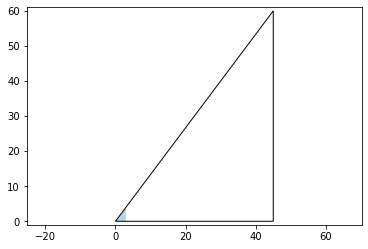

In [20]:
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
p0 = Polygon([(0,0), (3,0), (3,4),], alpha=0.3)
p1 = Polygon([(0,0), (45,0), (45,60),], fill=False)
fig, ax = plt.subplots(1,1)

ax.add_patch(p0)
ax.add_patch(p1)
ax.axis('equal')
ax.set(xlim=(0,45),ylim=(-1,61))
plt.show()

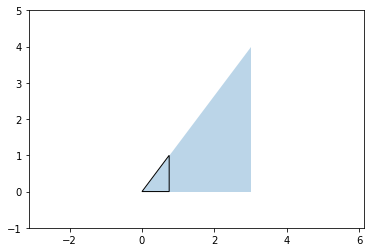

In [21]:
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
p0 = Polygon([(0,0), (3,0), (3,4),], alpha=0.3)
p1 = Polygon([(0,0), (45/60,0), (45/60,60/60),], fill=False)
fig, ax = plt.subplots(1,1)

ax.add_patch(p0)
ax.add_patch(p1)
ax.axis('equal')
ax.set(xlim=(0,3),ylim=(-1,5))
plt.show()

In [23]:
(75/60)**2, (45/60)**2

(1.5625, 0.5625)

In [4]:
df2.take([10])

,or,Short Side,Diagonal,Row #
10,(1).5625,45*,75*,11
